In [1]:
# Python
import pandas as pd
from fbprophet import Prophet

In [3]:
df = pd.read_excel('./Total_final.xlsx', index_col='TS', parse_dates=True, dtype={'Value':float})
df.drop(['Unnamed: 0','Unnamed: 0.1', 'Time', 'Max Value','Date'], axis=1, inplace=True)
df.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [4]:
df_day=df.resample(rule='D').sum()
df_day=df_day.reset_index()
#df_day.columns
df_day.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [5]:
df_day.tail()

,ds,y
344,2020-09-09,77844.9
345,2020-09-10,78377.4
346,2020-09-11,76560.6
347,2020-09-12,76635.9
348,2020-09-13,75723.9


In [6]:
df_day.drop(df_day.index[336], inplace=True)

In [7]:
df_day.tail()

,ds,y
344,2020-09-09,77844.9
345,2020-09-10,78377.4
346,2020-09-11,76560.6
347,2020-09-12,76635.9
348,2020-09-13,75723.9


In [8]:
m = Prophet(yearly_seasonality=True,daily_seasonality=True)
m.fit(df_day)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [37]:
future = m.make_future_dataframe(100, freq= 'D') # Forecasting 7 days
future.tail()

ValueError: ignored

In [34]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
438,2020-12-13,78157.641532,76788.791400,79680.983428
439,2020-12-14,78222.284282,76650.706759,79714.111459
440,2020-12-15,78566.967475,76993.501277,80048.448261
441,2020-12-16,78782.269023,77220.470252,80360.981832
442,2020-12-17,78848.361254,77355.782127,80318.478371
443,2020-12-18,78820.429941,77279.923535,80437.374336
444,2020-12-19,78791.413105,77268.212949,80263.751505
445,2020-12-20,78784.785100,77231.667933,80371.536825
446,2020-12-21,78775.788515,77189.237821,80371.473170
447,2020-12-22,79035.780784,77512.801261,80491.887262


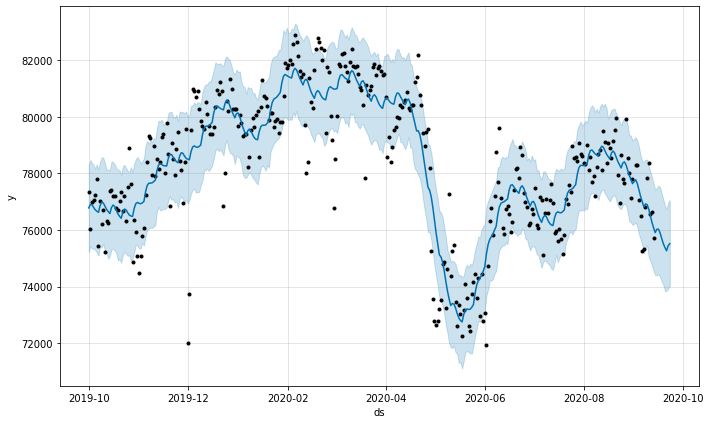

In [31]:
fig1 = m.plot(forecast)

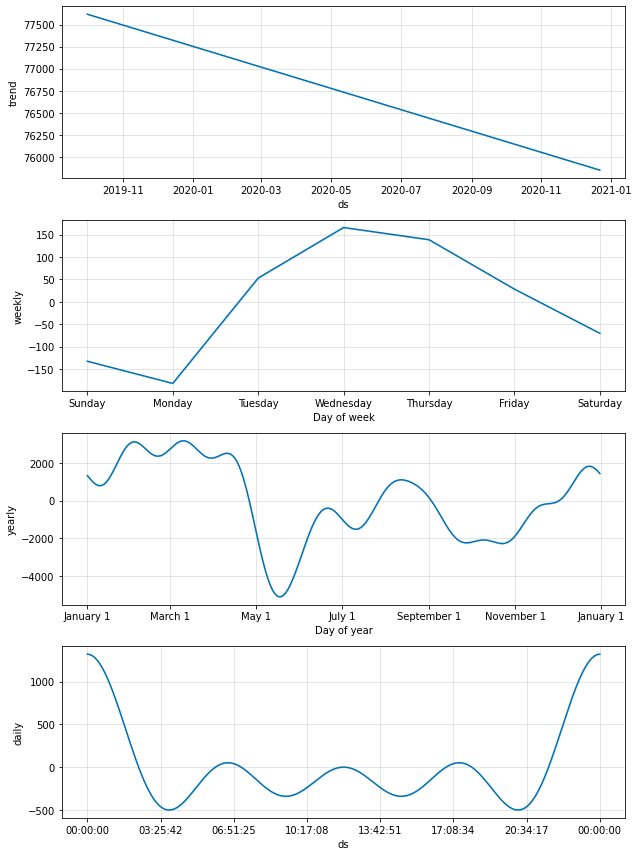

In [35]:
fig2 = m.plot_components(forecast)

In [13]:
from fbprophet.plot import plot_plotly
import plotly.offline as py

#py.init_notebook_mode(connected=True)
py.offline.init_notebook_mode(connected=True)
#py.init_notebook_mode()

In [16]:
fig = plot_plotly(m, forecast)  # This returns a plotly Figure

py.iplot(fig)

In [39]:
fig